**Assignment 9 - Implementing Principal Component Analysis**

Name - Arthreya Krishnakumar

Admission Number - 21JE0168


In [2]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import eig

In [3]:
iris = load_iris()
X = iris['data']
y = iris['target']
n_samples, n_features = X.shape
X.shape

(150, 4)

In [4]:
features=iris.feature_names

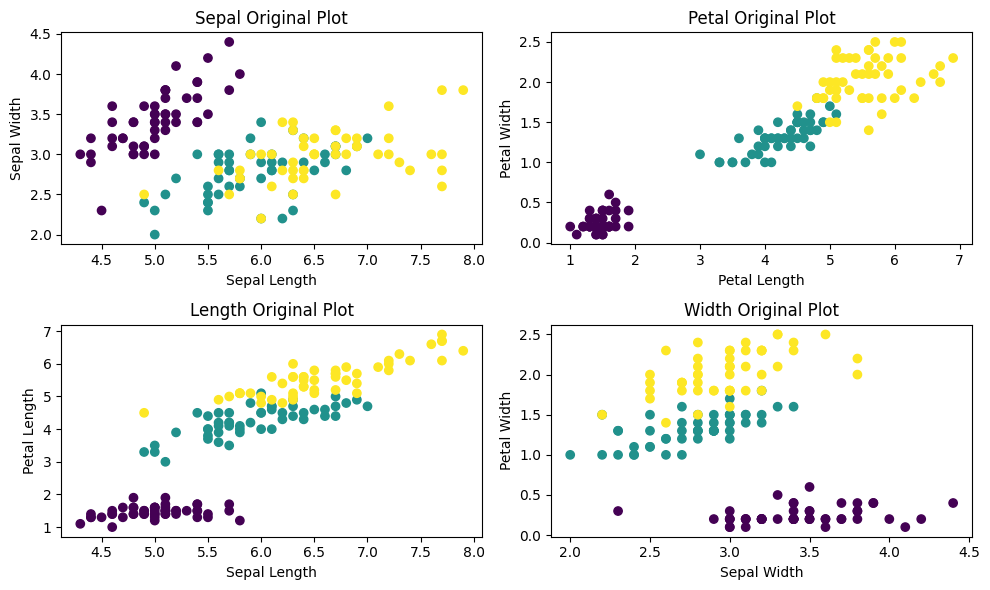

In [5]:
plt.figure(figsize=(10,6))
#scatter plot of sepal length vs sepal width
plt.subplot(2,2,1)
plt.scatter(list(X[:,0]), list(X[:,1]), marker='o', c = y)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Original Plot')
plt.tight_layout()
#scatter plot of petal length vs petal width
plt.subplot(2,2,2)
plt.scatter(list(X[:,2]), list(X[:,3]), marker='o', c = y)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal Original Plot')
plt.tight_layout()
#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)
plt.scatter(list(X[:,0]), list(X[:,2]), marker='o', c = y)
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('Length Original Plot')
plt.tight_layout()
#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)
plt.scatter(list(X[:,1]), list(X[:,3]), marker='o', c = y)
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Width Original Plot')
plt.tight_layout()

In [6]:
X_std=(X - np.mean(X, axis = 0))/np.std(X, axis = 0)

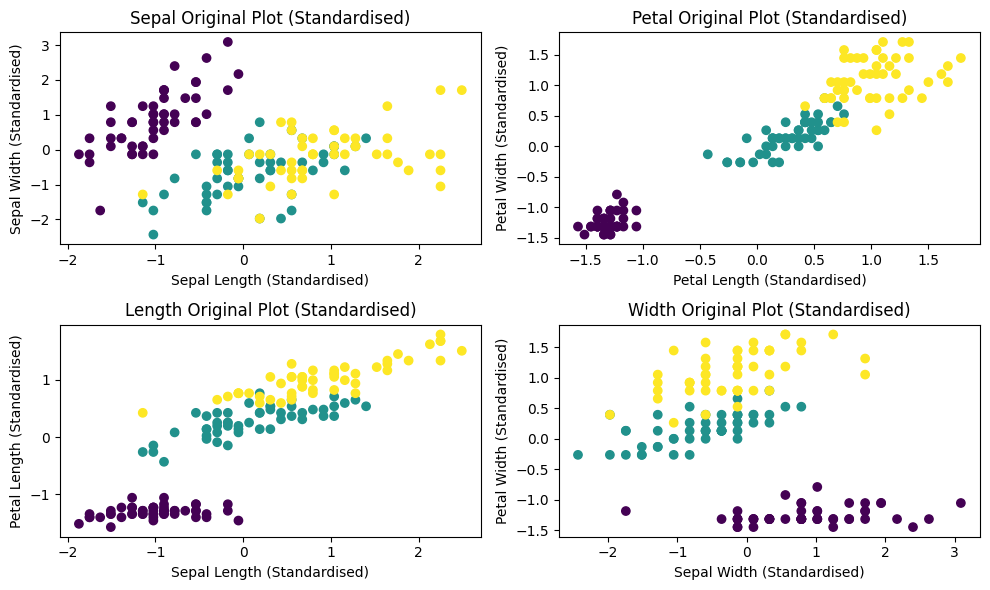

In [7]:
plt.figure(figsize=(10,6))
#scatter plot of sepal length vs sepal width
plt.subplot(2,2,1)
plt.scatter(list(X_std[:,0]), list(X_std[:,1]), marker='o', c = y)
plt.xlabel('Sepal Length (Standardised)')
plt.ylabel('Sepal Width (Standardised)')
plt.title('Sepal Original Plot (Standardised)')
plt.tight_layout()
#scatter plot of petal length vs petal width
plt.subplot(2,2,2)
plt.scatter(list(X_std[:,2]), list(X_std[:,3]), marker='o', c = y)
plt.xlabel('Petal Length (Standardised)')
plt.ylabel('Petal Width (Standardised)')
plt.title('Petal Original Plot (Standardised)')
plt.tight_layout()
#scatter plot of petal length vs sepal length
plt.subplot(2,2,3)
plt.scatter(list(X_std[:,0]), list(X_std[:,2]), marker='o', c = y)
plt.xlabel('Sepal Length (Standardised)')
plt.ylabel('Petal Length (Standardised)')
plt.title('Length Original Plot (Standardised)')
plt.tight_layout()
#scatter plot of petal width vs sepal width
plt.subplot(2,2,4)
plt.scatter(list(X_std[:,1]), list(X_std[:,3]), marker='o', c = y)
plt.xlabel('Sepal Width (Standardised)')
plt.ylabel('Petal Width (Standardised)')
plt.title('Width Original Plot (Standardised)')
plt.tight_layout()

In [8]:
cov_mat = np.cov(X_std.T)

In [19]:
eig_vals, eig_vecs = eig(cov_mat)
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T
print('Features \n', features)
print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Features 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Eigenvalues 
 [2.93808505 0.9201649  0.14774182 0.02085386]
Eigenvectors 
 [[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [ 0.71956635 -0.24438178 -0.14212637 -0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [10]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
print("Eigen Value and Vector Pairs")
for i in range(len(eig_pairs)):
  print(eig_pairs[i])

Eigen Value and Vector Pairs
(2.938085050199995, array([ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654]))
(0.9201649041624864, array([0.37741762, 0.92329566, 0.02449161, 0.06694199]))
(0.1477418210449475, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274]))
(0.020853862176462696, array([-0.26128628,  0.12350962,  0.80144925, -0.52359713]))


In [20]:
k = 2
W = eig_vecs_sorted[:k, :]
W.shape
print("Dominant Features are : ",features[0]," and ",features[1])

Dominant Features are :  sepal length (cm)  and  sepal width (cm)


In [21]:
cov_mat_X = np.cov(X.T)
eig_vals_X, eig_vecs_X = eig(cov_mat_X)

In [12]:
X_proj = X_std.dot(W.T)
X_proj.shape

(150, 2)

In [38]:
k = 2
eig_pairs_X = [(np.abs(eig_vals_X[i]), eig_vecs_X[i,:]) for i in range(k)]
eig_vecs_sorted_X = np.array([x[1] for x in eig_pairs])
W_X=eig_vecs_sorted_X[:k, :]


In [39]:
W_X

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [40]:
X_proj1 = X.dot(W_X.T)
X_proj1.shape

(150, 2)

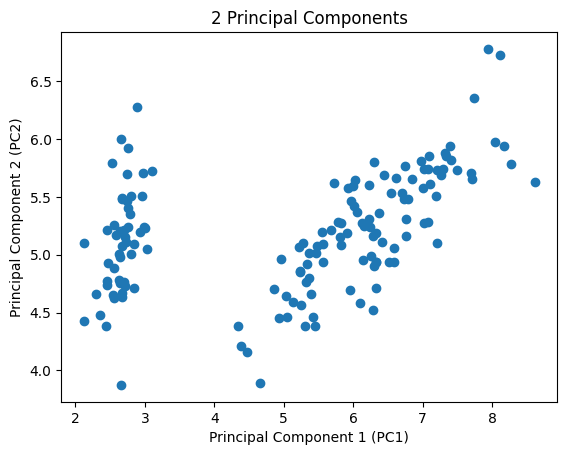

In [42]:
plt.scatter(X_proj1[:, 0], X_proj1[:, 1])
plt.xlabel('Principal Component 1 (PC1)');
plt.ylabel('Principal Component 2 (PC2)');
plt.title('2 Principal Components')
plt.show()

In [14]:
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=1000):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i]
        for i in range(self.max_iter):
            self.classifications = {}
            for i in range(self.k):
                self.classifications[i] = []
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)
            prev_centroids = dict(self.centroids)
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)
                original_centroid = prev_centroids[classification]
                current_centroid = self.centroids[classification]
                cost_ele=np.sum((current_centroid-original_centroid)/original_centroid*100.0)
            optimized = True
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False
            if optimized:
                break
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

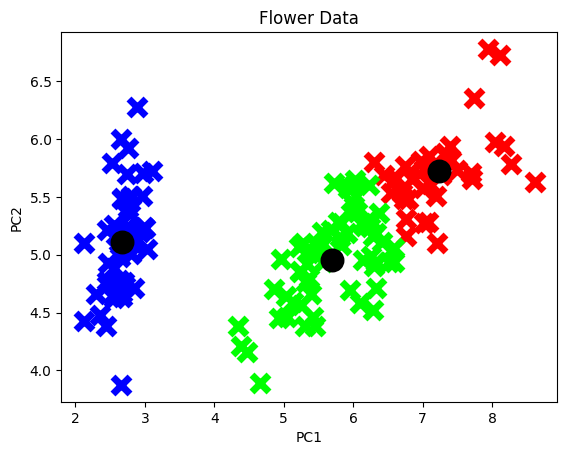

In [43]:
model = K_Means()
model.fit(X_proj1)
colors = ["#FF0000", "#00FF00", "#0000FF"]
labels=[]
for classification in model.classifications:
    color = colors[classification]
    for featureset in model.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)
        labels.append(classification)
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)
plt.title("Flower Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [44]:
score=0
for i in range(0,len(labels)):
  if (y[i]==labels[i]):
    score=score+1

**Conclusion**

Here, K-Means algorithm is applied on PC1 and PC2 to verify that this 2 dimesional data holds most of the information of original 4 dimensional data. As we are getting accuracy of prediction about 95 %. We can conclude that the PCA algorithm is a good way to reduce the dimensions of data and analyse it further.

In [45]:
accuracy=score/len(labels)
print("The accuracy of the model is : ", accuracy*100, "%")

The accuracy of the model is :  92.0 %
